In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from keras import regularizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D,Conv3D, Dropout, MaxPooling2D, BatchNormalization, LeakyReLU, ZeroPadding2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from keras.layers import Dense, Activation
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import h5py
from keras.models import load_model
from sklearn.preprocessing import scale
init_notebook_mode(connected=True)
RANDOM_STATE = 2018
batch_size = 64
epochs = 200
dimensions = 28
no_of_classes = 4


Using TensorFlow backend.


In [2]:
rows = 2516
train_x = pd.read_csv("../input/pattern-new-28-2516/patterdataset32_rot_gray.csv", delimiter=",", header=None)
train_y1 = pd.read_csv("../input/pattern-new-28-2516/pattern_label32_rot_gray.csv", header=None)

print(train_x.shape)
print(train_y1.shape)

(2516, 784)
(2516, 1)


In [3]:
train_y = np.zeros((rows, 4))
train_y1 = np.array(train_y1)

for i in range(len(train_y)):
    train_y[i][int(train_y1[i])] = 1

print(train_y.shape)

(2516, 4)


In [4]:
from sklearn.utils import shuffle
train_x, train_y = shuffle(train_x, train_y, random_state=0)

In [5]:
print(train_x.shape)
print(train_y.shape)

(2516, 784)
(2516, 4)


In [6]:
train_x = np.array(train_x)
train_x  = train_x.reshape(rows, 28,28,1)
print(train_x.shape)
train_x = cv2.normalize(train_x, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
train_x=train_x/255.0

(2516, 28, 28, 1)


In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=400, random_state=RANDOM_STATE)
print(X_train.shape)
print(X_val.shape)

(2116, 28, 28, 1)
(400, 28, 28, 1)


In [8]:
X_train, x_test, y_train, y_test = train_test_split(X_train, y_train , test_size=100, random_state=RANDOM_STATE)
print(X_train.shape)
print(x_test.shape)
print(y_test.shape)

(2016, 28, 28, 1)
(100, 28, 28, 1)
(100, 4)


In [9]:
X_train  = np.array(X_train)
X_val = np.array(X_val)
x_test = np.array(x_test)
#X_train = np.reshape(X_train,(2000,100,100,1))
#X_val = np.reshape(X_val,(400,100, 100, 1))
#x_test = np.reshape(x_test,(116, 100,100,1))
print(X_train.shape)
print(X_val.shape)
print(x_test.shape)

(2016, 28, 28, 1)
(400, 28, 28, 1)
(100, 28, 28, 1)


In [10]:
'''temp = np.reshape(X_train,(500,128,128))
for i in range(10,15):
    print(y_train[i])
    plt.imshow(temp[i])
    plt.show()'''

'temp = np.reshape(X_train,(500,128,128))\nfor i in range(10,15):\n    print(y_train[i])\n    plt.imshow(temp[i])\n    plt.show()'

In [11]:
#print(X_train[0][:,:,0])

In [12]:
'''model = Sequential()

model.add(Conv2D(64, kernel_size = (3,3), strides=(1,1), activation = 'relu', input_shape = (128, 128,1)))
model.add(MaxPooling2D((2,2), strides = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = (3,3), strides=(1,1), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size = (3,3), strides=(1,1), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, kernel_size = (3,3), strides=(1,1), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, kernel_size = (3,3), strides=(1,1), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(25088, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2048, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

'''

"model = Sequential()\n\nmodel.add(Conv2D(64, kernel_size = (3,3), strides=(1,1), activation = 'relu', input_shape = (128, 128,1)))\nmodel.add(MaxPooling2D((2,2), strides = (2,2)))\nmodel.add(Dropout(0.4))\n\nmodel.add(Conv2D(128, kernel_size = (3,3), strides=(1,1), activation = 'relu'))\nmodel.add(MaxPooling2D((2,2), strides = (2,2)))\nmodel.add(Dropout(0.3))\n\nmodel.add(Conv2D(256, kernel_size = (3,3), strides=(1,1), activation = 'relu'))\nmodel.add(MaxPooling2D((2,2), strides=(2,2)))\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(512, kernel_size = (3,3), strides=(1,1), activation = 'relu'))\nmodel.add(MaxPooling2D((2,2), strides=(2,2)))\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(512, kernel_size = (3,3), strides=(1,1), activation = 'relu'))\nmodel.add(MaxPooling2D((2,2), strides=(2,2)))\nmodel.add(Dropout(0.2))\n\nmodel.add(Flatten())\nmodel.add(Dense(25088, activation='relu'))\nmodel.add(Dense(4096, activation='relu'))\nmodel.add(Dense(2048, activation = 'relu'))\nmodel.add(Dense

In [13]:

model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# Add dropouts to the model
#model.add(Dropout(0.3))
#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

#compile the model
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=0.01), metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
train_model = model.fit(X_train, y_train, batch_size = batch_size, epochs = 100, verbose=2, validation_data=(X_val, y_val))

Train on 2016 samples, validate on 400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 1.4852 - acc: 0.3805 - val_loss: 1.3793 - val_acc: 0.2450
Epoch 2/100
 - 0s - loss: 1.2086 - acc: 0.4588 - val_loss: 1.3065 - val_acc: 0.3375
Epoch 3/100
 - 0s - loss: 1.1505 - acc: 0.4906 - val_loss: 1.2569 - val_acc: 0.3800
Epoch 4/100
 - 0s - loss: 1.1037 - acc: 0.5074 - val_loss: 1.2043 - val_acc: 0.4175
Epoch 5/100
 - 0s - loss: 1.0936 - acc: 0.5114 - val_loss: 1.1777 - val_acc: 0.4225
Epoch 6/100
 - 0s - loss: 1.0421 - acc: 0.5342 - val_loss: 1.1574 - val_acc: 0.4250
Epoch 7/100
 - 0s - loss: 1.0192 - acc: 0.5471 - val_loss: 1.2883 - val_acc: 0.3950
Epoch 8/100
 - 0s - loss: 1.0368 - acc: 0.5387 - val_loss: 1.2713 - val_acc: 0.4200
Epoch 9/100
 - 0s - loss: 0.9925 - acc: 0.5575 - val_loss: 1.3124 - val_acc: 0.4400
Epoch 10/100
 - 0s - loss: 0.9731 - acc: 0.5734 - val_loss: 1.3281 - val_acc: 0.4300
Epoch 11/100
 - 0s - loss: 0.9396 - acc: 0.6002 - val_loss: 1.27

In [15]:
model.save_weights('patternweights_2836_gray_100.h5')
model.save('patternmodel_2836_gray-100.h5')

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 5, 5, 64)          256       
__________

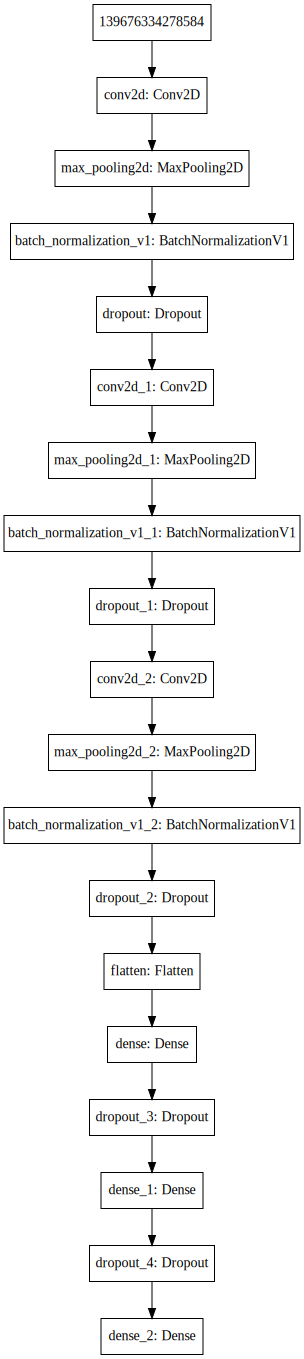

In [17]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
##plot accuracy and loss

def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

#plot_accuracy_and_loss(train_model)

In [19]:
plot_accuracy_and_loss(train_model)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.46589709097519516
Test accuracy: 0.85


In [21]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)
#get the indices to be plotted
print(predicted_classes)
count = 0
for i in range(len(y_test)):
    if(y_test[i][predicted_classes[i]]== 1):
        count+=1
print(count)

[2 1 0 2 0 0 1 3 1 1 2 0 2 0 2 1 2 2 1 1 1 3 2 2 2 2 1 0 3 0 1 2 0 0 1 2 3
 1 1 0 2 2 3 2 0 1 3 0 2 2 3 0 0 3 2 2 2 0 2 2 2 1 2 3 1 1 1 0 2 2 2 0 0 1
 1 0 2 2 3 2 3 3 0 1 1 3 0 0 1 3 0 2 0 1 2 1 0 0 1 1]
85


In [22]:
p = predicted_classes[:26]
y = y_true[:26]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

NameError: name 'y_true' is not defined

(41, 1)
(41, 10000)
-----------------------


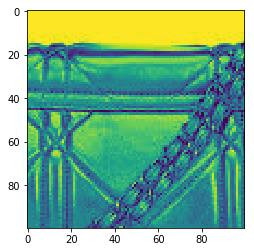

[0.]
[3]
[[2.7927113e-05 1.9017767e-04 1.3136543e-01 8.6841637e-01]]
-------------------------
-----------------------


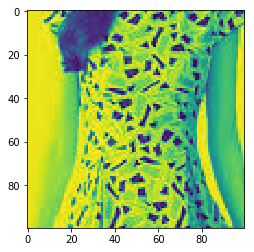

[0.]
[0]
[[9.9544048e-01 1.8243467e-06 4.4943281e-03 6.3379186e-05]]
-------------------------
-----------------------


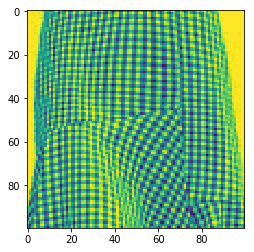

[0.]
[2]
[[1.7209530e-01 6.0961168e-04 8.2661223e-01 6.8285636e-04]]
-------------------------
-----------------------


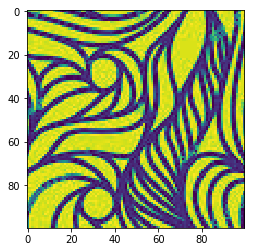

[0.]
[0]
[[9.9999094e-01 7.1794282e-09 7.8527792e-06 1.1965994e-06]]
-------------------------
-----------------------


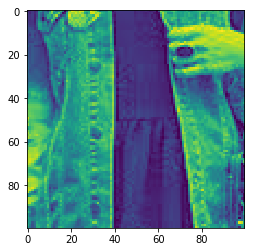

[0.]
[3]
[[2.4893556e-02 1.7304736e-05 2.5943480e-03 9.7249484e-01]]
-------------------------
-----------------------


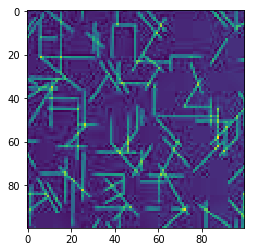

[0.]
[0]
[[8.9838046e-01 5.3378865e-02 4.8193693e-02 4.6955440e-05]]
-------------------------
-----------------------


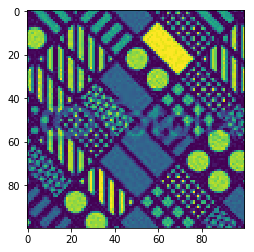

[0.]
[0]
[[9.9997199e-01 6.0263419e-06 2.0884207e-05 1.0689374e-06]]
-------------------------
-----------------------


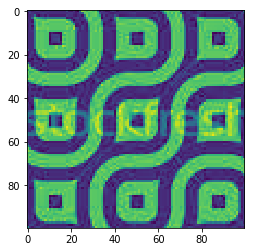

[0.]
[0]
[[9.9976820e-01 2.0746110e-07 2.3127600e-04 3.0481462e-07]]
-------------------------
-----------------------


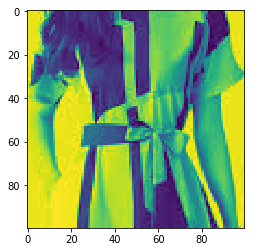

[0.]
[3]
[[2.0453414e-01 7.1821181e-05 1.3103499e-01 6.6435909e-01]]
-------------------------
-----------------------


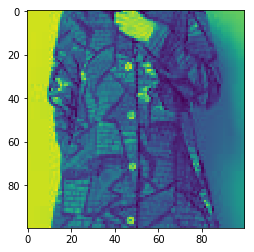

[0.]
[0]
[[0.61440927 0.01355113 0.3406998  0.03133982]]
-------------------------
-----------------------


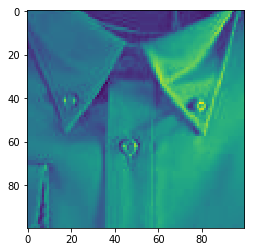

[1.]
[0]
[[0.6387174  0.15783279 0.20241728 0.00103248]]
-------------------------
-----------------------


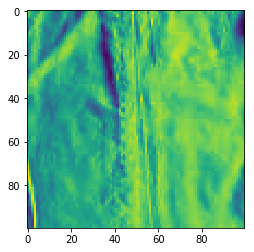

[1.]
[3]
[[7.4417922e-03 2.8276353e-04 5.5570431e-02 9.3670499e-01]]
-------------------------
-----------------------


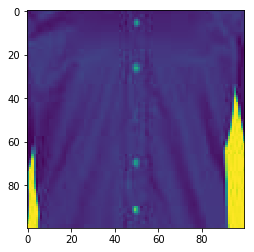

[1.]
[1]
[[4.8597180e-04 9.7902781e-01 1.5619566e-02 4.8666447e-03]]
-------------------------
-----------------------


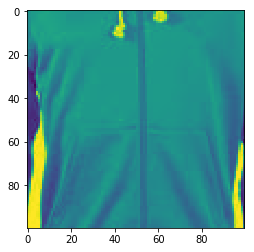

[1.]
[3]
[[0.02618855 0.02255141 0.0801755  0.8710846 ]]
-------------------------
-----------------------


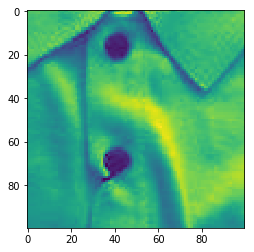

[1.]
[2]
[[5.4815043e-02 9.0277295e-05 9.4350398e-01 1.5907278e-03]]
-------------------------
-----------------------


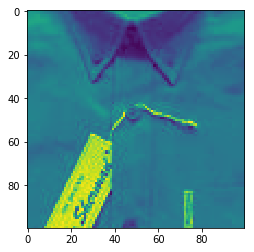

[1.]
[2]
[[1.6270684e-02 6.2631756e-05 9.7226769e-01 1.1398946e-02]]
-------------------------
-----------------------


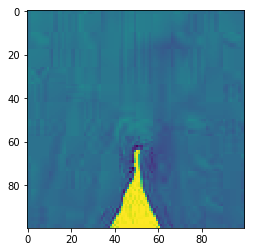

[1.]
[1]
[[8.1189655e-06 9.9959189e-01 1.4983027e-04 2.5020688e-04]]
-------------------------
-----------------------


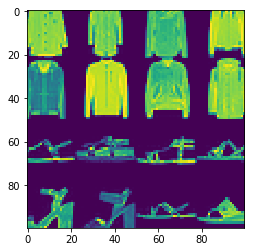

[1.]
[0]
[[9.9999976e-01 2.4149244e-07 6.5623484e-09 1.7051788e-08]]
-------------------------
-----------------------


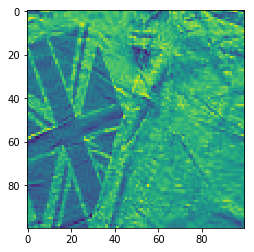

[1.]
[0]
[[8.9842618e-01 2.2459332e-02 7.8522265e-02 5.9216667e-04]]
-------------------------
-----------------------


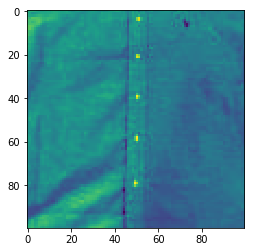

[1.]
[1]
[[3.1982048e-04 9.5354962e-01 4.2791620e-02 3.3388953e-03]]
-------------------------
-----------------------


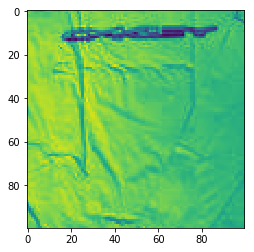

[1.]
[2]
[[3.7899439e-04 2.4367975e-05 9.9763787e-01 1.9586829e-03]]
-------------------------
-----------------------


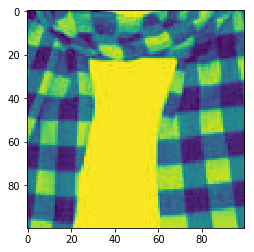

[2.]
[2]
[[4.7297094e-02 2.3132511e-06 9.5261514e-01 8.5344313e-05]]
-------------------------
-----------------------


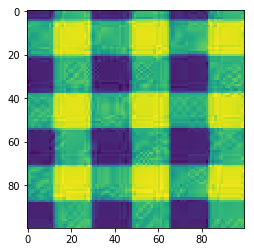

[2.]
[2]
[[8.8820909e-04 6.5093504e-09 9.9910671e-01 5.0503518e-06]]
-------------------------
-----------------------


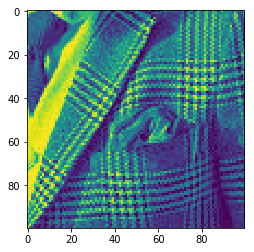

[2.]
[3]
[[1.1118484e-01 8.1745740e-05 8.5521281e-02 8.0321217e-01]]
-------------------------
-----------------------


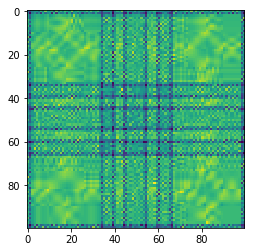

[2.]
[2]
[[5.6316330e-06 1.1036678e-09 9.9998987e-01 4.5326678e-06]]
-------------------------
-----------------------


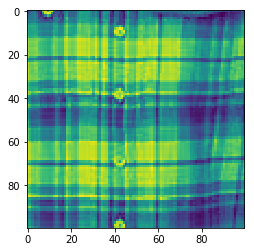

[2.]
[2]
[[2.4176046e-02 3.2585273e-03 9.7246325e-01 1.0212536e-04]]
-------------------------
-----------------------


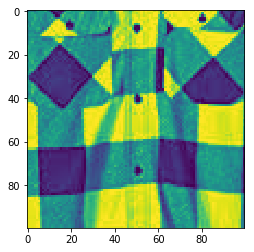

[2.]
[2]
[[1.3040884e-01 5.1200354e-06 8.6866516e-01 9.2089135e-04]]
-------------------------
-----------------------


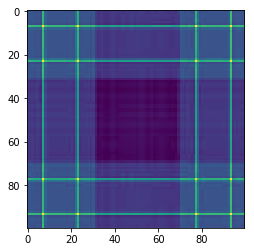

[2.]
[2]
[[1.6428862e-07 3.4157330e-07 9.9951959e-01 4.7989245e-04]]
-------------------------
-----------------------


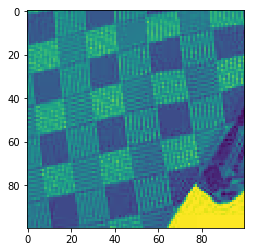

[2.]
[2]
[[8.0809757e-02 1.2200736e-04 9.1884136e-01 2.2686408e-04]]
-------------------------
-----------------------


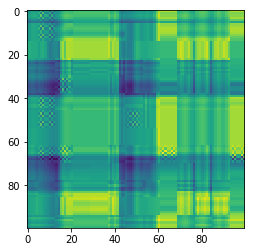

[2.]
[2]
[[7.5133880e-06 5.4146398e-09 9.9998593e-01 6.5788663e-06]]
-------------------------
-----------------------


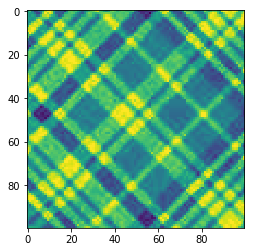

[2.]
[2]
[[6.5814640e-04 3.9972537e-08 9.9817741e-01 1.1644738e-03]]
-------------------------
-----------------------


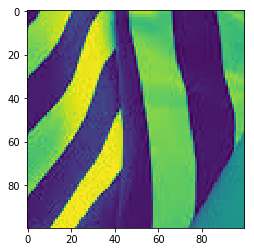

[3.]
[3]
[[3.8083559e-03 1.1360663e-05 3.2645094e-04 9.9585378e-01]]
-------------------------
-----------------------


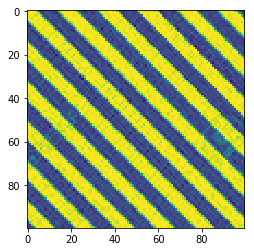

[3.]
[3]
[[0.05644689 0.09382328 0.26942855 0.5803012 ]]
-------------------------
-----------------------


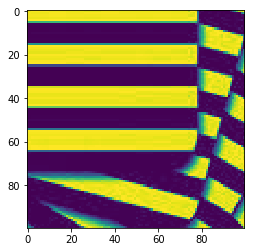

[3.]
[3]
[[4.5611168e-06 1.5125094e-07 5.6452950e-06 9.9998963e-01]]
-------------------------
-----------------------


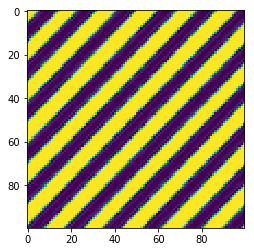

[3.]
[3]
[[1.5945499e-06 1.7606440e-09 5.4796561e-05 9.9994361e-01]]
-------------------------
-----------------------


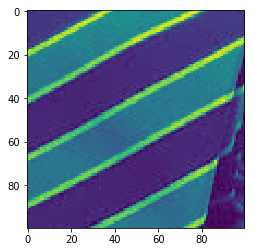

[3.]
[3]
[[2.82137742e-04 1.12142274e-07 6.41860897e-05 9.99653459e-01]]
-------------------------
-----------------------


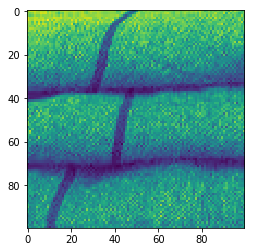

[3.]
[2]
[[1.3983645e-03 1.5094704e-06 9.9852258e-01 7.7566874e-05]]
-------------------------
-----------------------


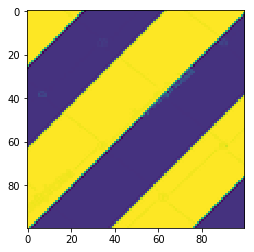

[3.]
[3]
[[8.2606664e-03 1.2291792e-05 7.1945794e-02 9.1978133e-01]]
-------------------------
-----------------------


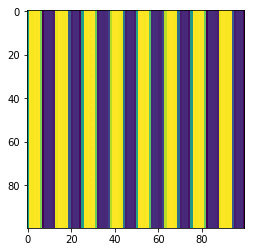

[3.]
[3]
[[1.1655745e-06 1.3652018e-09 9.4025927e-06 9.9998939e-01]]
-------------------------
-----------------------


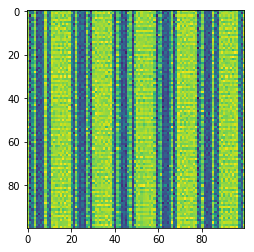

[3.]
[2]
[[5.6813483e-04 2.0933017e-05 9.6105832e-01 3.8352568e-02]]
-------------------------
-----------------------


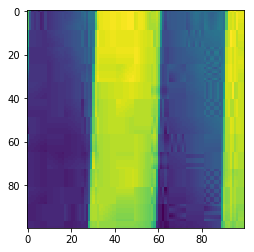

[3.]
[3]
[[4.7746289e-05 4.7959343e-08 2.0526192e-04 9.9974698e-01]]
-------------------------
26


In [23]:
test_x = pd.read_csv("../input/pattern-test-100cropped/pattern_test100_gray_cropped.csv",header=None)
test_y  = pd.read_csv("../input/pattern-100x100/pattern_testlabel_100gray.csv", header=None)
test_x = np.array(test_x)
test_x = test_x / 255.0
#img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

test_y = np.array(test_y)
print(test_y.shape)
print(test_x.shape)
length = len(test_y)
test_x = np.reshape(test_x, (41,100,100))
#original = test_x*255.0
#test_x = np.expand_dims(test_x, -1)
true_positive = 0
#print(test_x[i][:,:,0])
for i in range(length):
    print("-----------------------")
    #test_x[i] = test_x[i][:,:,0]
    #f = plt.figure()
    #f.add_subplot(1,2, 1)
    #plt.imshow(original[i])
    #f.add_subplot(1,2, 2)
    #kernel = np.ones((2,2),np.float32)
    #test_x[i][:,:,0] =  cv2.filter2D(test_x[i][:,:,0],-1,kernel)
    
    #test_x[i][:,:,0][test_x[i][:,:,0]==1.0] = 0.0
    
    plt.imshow(test_x[i])
    plt.show(block=True)
    test_img = cv2.resize(test_x[i], (28, 28))
    test_img = np.expand_dims(test_img, -1)
    test_img = np.expand_dims(test_img, 0)
    img_class  = model.predict_classes(test_img)
    if(img_class[0] == test_y[i]):
        true_positive = true_positive + 1
    print(test_y[i])
    print(img_class)
    print(model.predict(test_img))
    print("-------------------------")
    
print(true_positive)